In [18]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [4]:
df = pd.read_csv('RS_Session_265_AU_2104_2.ii_.csv')
print(df.head())
print(df.describe())
print(df.info())

  Sl. No.  Crops  2018-19   2019-20   2020-21   2021-22   2022-23   2023-24
0       1  Paddy  9705105  12459354  13112458  12679650  12497077  12487807
1       2  Jowar     5969      7735     41507     41362     18187     40422
2       3  Bajra      231         0     44166      5010     48536    370000
3       4  Maize     3880         8     55675      6641        43     59680
4       5   Ragi    27201     93026    231211    308696    310519    466198
            2018-19       2019-20       2020-21       2021-22       2022-23   
count  2.300000e+01  2.300000e+01  2.300000e+01  2.300000e+01  2.300000e+01  \
mean   1.413516e+06  1.804790e+06  1.773251e+06  1.689651e+06  1.432158e+06   
std    3.870706e+06  4.908993e+06  4.945987e+06  4.759615e+06  4.182431e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.157500e+03  5.350000e+01  2.150000e+01  0.000000e+00  1.350000e+01   
50%    2.720100e+04  7.735000e+03  7.690000e+03  2.585000e+03  1.81870

In [5]:
null_1 =df.isnull().sum()
#print(null_1)
duplicates = df.duplicated().sum()
print(duplicates)

0


In [6]:
df.drop(columns=['Sl. No.'] ,inplace = True)

In [7]:
z_score = np.abs(stats.zscore(df.iloc[:, 1:]))
print(z_score)
z_scores_mask = z_score < 3


     2018-19   2019-20   2020-21   2021-22   2022-23   2023-24
0   2.190282  2.219197  2.344133  2.360905  2.705030  2.608732
1   0.371814  0.374301  0.358000  0.354090  0.345672  0.346888
2   0.373329  0.375912  0.357450  0.361900  0.338253  0.268630
3   0.372365  0.375911  0.355071  0.361549  0.350108  0.342315
4   0.366205  0.356536  0.318783  0.296661  0.274206  0.245788
5   0.298938  0.257746  0.364991  0.357802  0.350118  0.356486
6   0.300191  0.353862  0.349064  0.321013  0.308695  0.349333
7   0.265402  0.375892  0.366296  0.362421  0.350112  0.356486
8   0.284728  0.303544  0.335008  0.346510  0.349222  0.350126
9   0.372840  0.375267  0.366020  0.362718  0.348805  0.353759
10  0.370388  0.374965  0.366580  0.362976  0.350118  0.355516
11  0.373390  0.375912  0.366581  0.362976  0.350118  0.356486
12  0.373386  0.375912  0.366581  0.362976  0.350118  0.356486
13  0.310453  0.071898  0.029101  0.362933  0.350118  0.184421
14  0.692078  0.364978  0.529787  0.693930  0.085817  0

NO MISSING VALUES AND NO DUPLICATES IN DATASET 

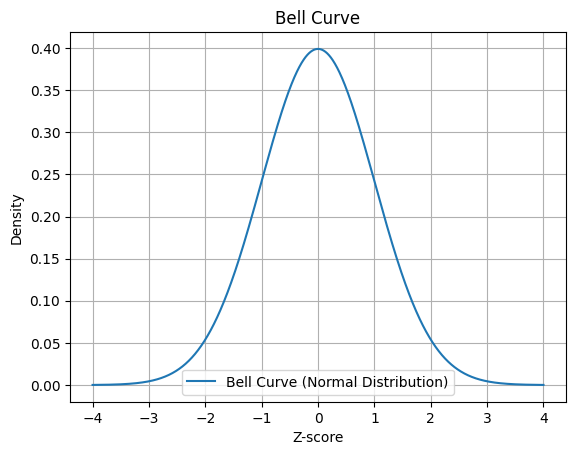

In [10]:
# Generate data for the bell curve
x = np.linspace(-4, 4, 1000)  # Range of values for Z-scores
y = norm.pdf(x)  # Probability density function

# Plot the bell curve
plt.plot(x, y, label='Bell Curve (Normal Distribution)')
plt.title('Bell Curve')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()


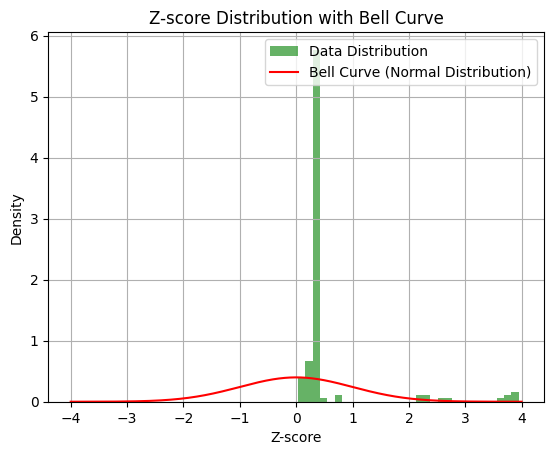

In [11]:

# Flatten z_scores to a 1D array if it's not already
z_scores_flat = z_score.to_numpy().flatten()

# Plot histogram of your Z-scores
plt.hist(z_scores_flat, bins=30, density=True, alpha=0.6, color='g', label='Data Distribution')

# Overlay the bell curve
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)
plt.plot(x, y, label='Bell Curve (Normal Distribution)', color='red')

plt.title('Z-score Distribution with Bell Curve')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()


In [24]:
df_excluded_last = df.iloc[:-1, :]


fig = go.Figure()

for year in df.columns[1:]:
    fig.add_trace(go.Scatter(x=df_excluded_last['Crops'], y=df_excluded_last[year], mode='lines+markers', name=year))

fig.update_layout(title='Crop Production Over Years', xaxis_title='Crops', yaxis_title='Production')
fig.show()
